## Decision Tree Classification

In [35]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [6]:
iris = load_iris()

df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
tree_clf = DecisionTreeClassifier(max_depth=5, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

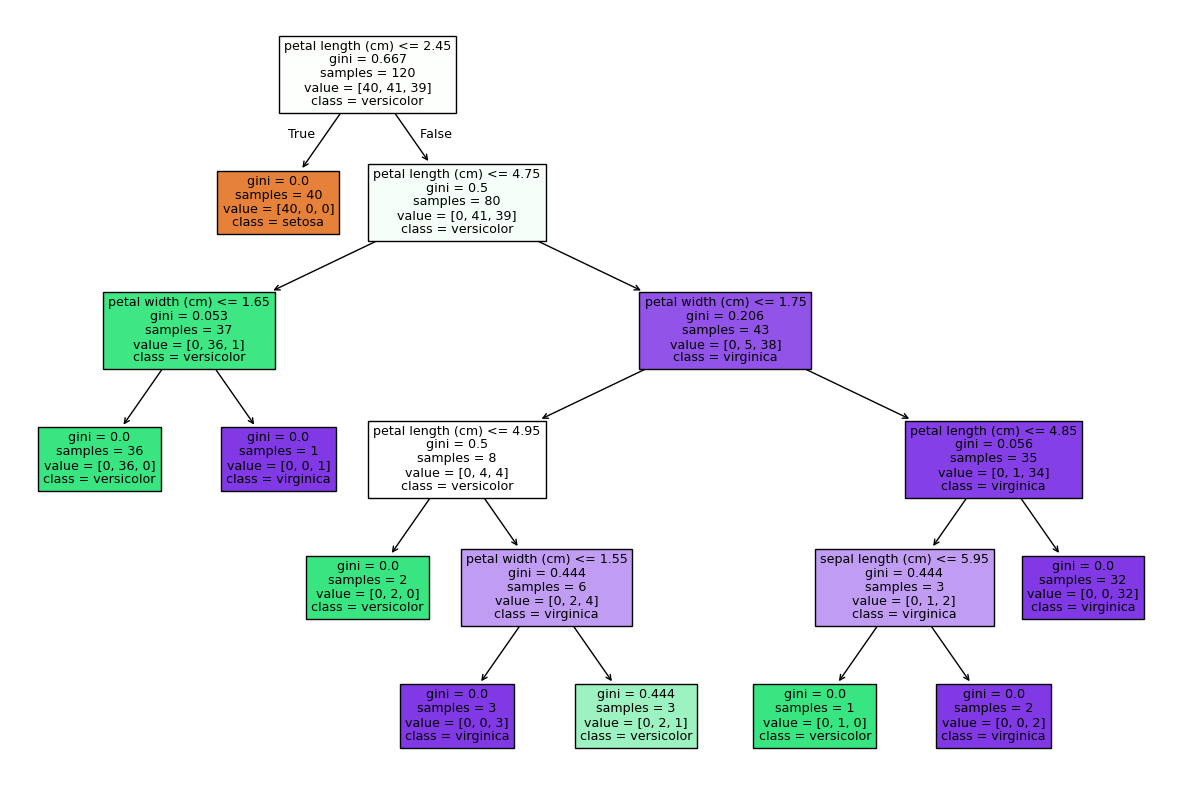

In [26]:
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, filled=True, feature_names=df.columns, class_names=iris.target_names)
plt.show()

In [27]:
tree_clf_2 = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf_2.fit(X_train, y_train)
y_pred_2 = tree_clf_2.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy_2 * 100:.2f}%")

Accuracy: 96.67%


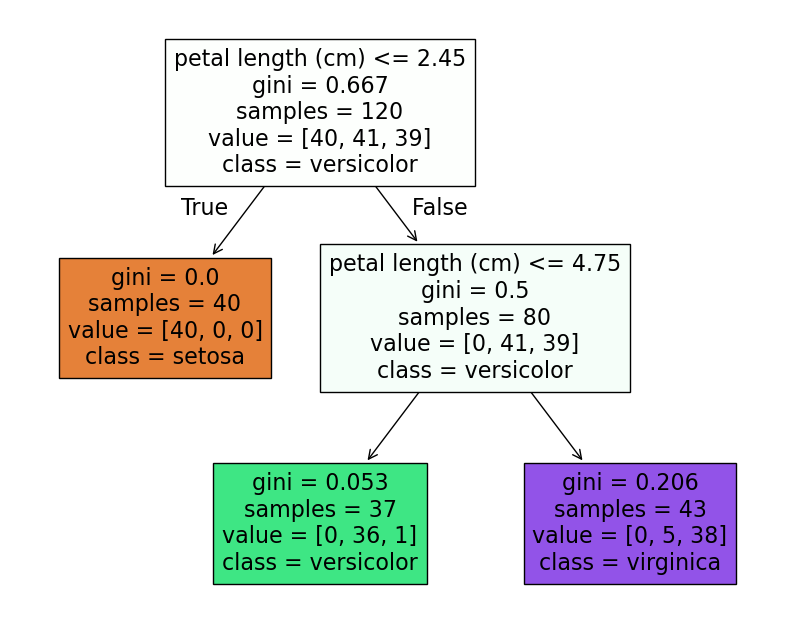

In [30]:
plt.figure(figsize=(10, 8))
plot_tree(tree_clf_2, filled=True, feature_names=df.columns, class_names=iris.target_names)
plt.show()

In [31]:
tree_clf_3 = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)
tree_clf_3.fit(X_train, y_train)
y_pred_3 = tree_clf_3.predict(X_test)

accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Accuracy: {accuracy_3 * 100:.2f}%")

Accuracy: 100.00%


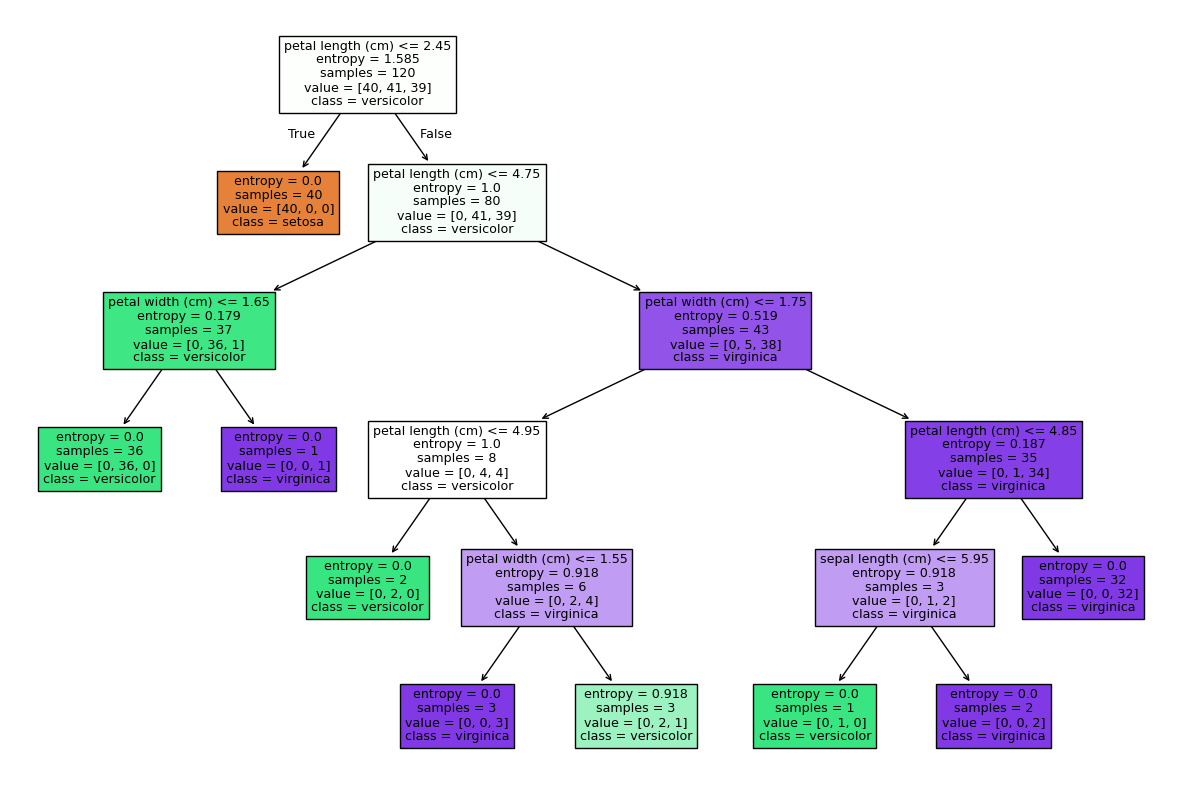

In [32]:
plt.figure(figsize=(15, 10))
plot_tree(tree_clf_3, filled=True, feature_names=df.columns, class_names=iris.target_names)
plt.show()

In [37]:
iris.feature_names[np.argmax(tree_clf.feature_importances_)]

'petal length (cm)'

The most important feature is petal length (base root).

In [41]:
feature_importances = tree_clf.feature_importances_
feature_names = iris.feature_names
feature_importances_sorted = sorted(zip(feature_importances, feature_names), reverse=True)

for feature_importance, feature_name in feature_importances_sorted:
    print(f"{feature_name}: {feature_importance:.2f}")

petal length (cm): 0.90
petal width (cm): 0.08
sepal length (cm): 0.02
sepal width (cm): 0.00


## Feature Selection

In [19]:
from sklearn.datasets import load_iris, load_diabetes
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
import warnings
warnings.filterwarnings("ignore")

(0.0, 7.9, -0.9, 3.5)

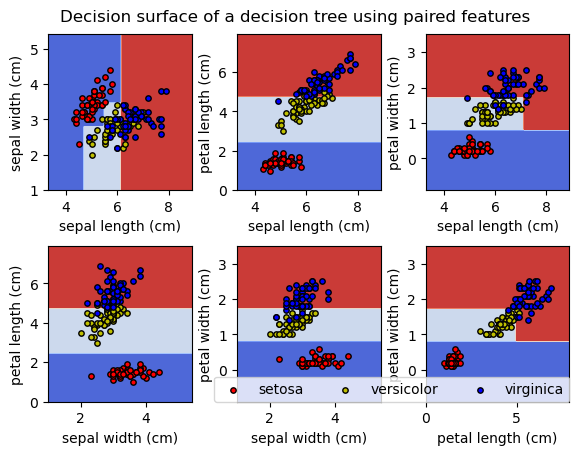

In [8]:
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X, y)

    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.coolwarm,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    for i, color in zip(range(3), "ryb"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.coolwarm, edgecolor="black", s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderaxespad=0, ncol=3)
plt.axis("tight")




## Decision Tree Regressor

In [17]:
diabetes = load_diabetes()

In [24]:
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

In [25]:
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
y_pred = regressor.predict(X_test)
y_pred[:5]

array([175.33333333, 182.77333333, 175.33333333, 241.2       ,
       121.859375  ])

In [32]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

3568.9652613232283

In [ ]:
rmse = root_mean_squared_error(y_test, y_pred) # or you can write np.sqrt(mse)
rmse

59.74081738077601

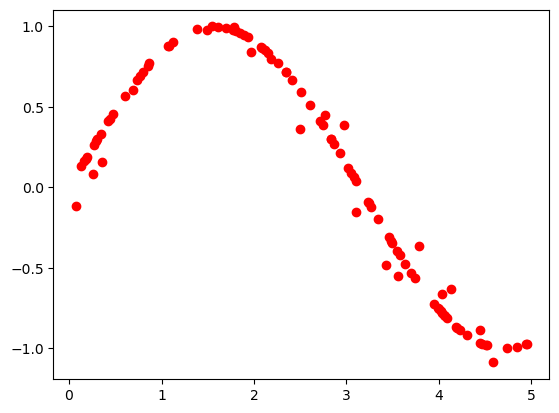

In [44]:
# Creating a dataset
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 0.5 * (0.5 - np.random.rand(20))
plt.scatter(X, y, c='r', label='data');

In [51]:
regressor_1 = DecisionTreeRegressor(max_depth=2)
regressor_2 = DecisionTreeRegressor(max_depth=5)
regressor_3 = DecisionTreeRegressor(max_depth=8)

regressor_1.fit(X, y)
regressor_2.fit(X, y)
regressor_3.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.05)[:, np.newaxis]

y_pred_1 = regressor_1.predict(X_test)
y_pred_2 = regressor_2.predict(X_test)
y_pred_3 = regressor_3.predict(X_test)

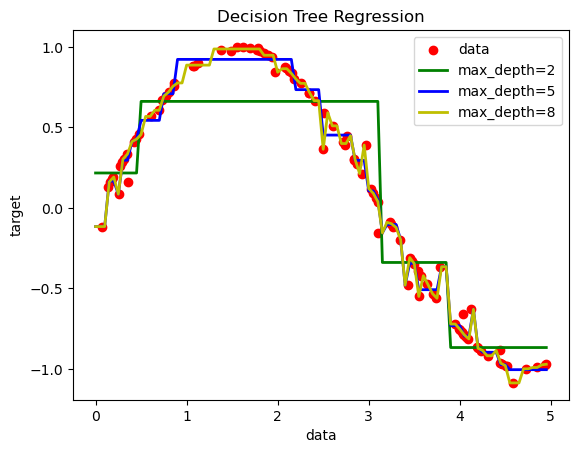

In [52]:
plt.figure()
plt.scatter(X, y, c='r', label='data')
plt.plot(X_test, y_pred_1, c='g', label='max_depth=2', linewidth=2)
plt.plot(X_test, y_pred_2, c='b', label='max_depth=5', linewidth=2)
plt.plot(X_test, y_pred_3, c='y', label='max_depth=8', linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()